In [2]:
import numpy as np
from tqdm.auto import trange, tqdm
import matplotlib.pyplot as plt
import timeit
from functools import partial

%matplotlib inline

In [7]:
X = np.random.random((200,200))
y = np.random.random((200,))

b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
yhat = X.dot(b)

np.sum(y-yhat)

-1.5725321489412636e-08

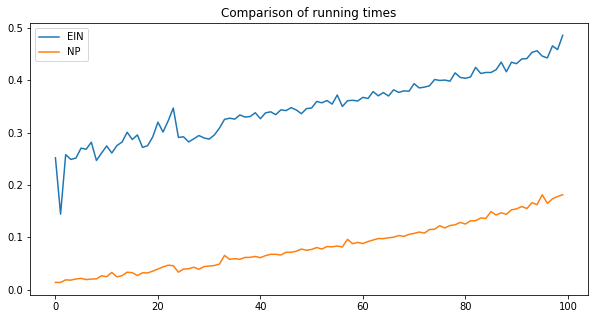

In [52]:
ein_time_list = list()
np_time_list = list()

path1 = np.einsum_path('ji,jk->ik', X, X, optimize='optimal')[0]
path2 = np.einsum_path('ij,kj->ik', X, X, optimize='optimal')[0]
path3 = np.einsum_path('ij,j->i', X, y, optimize='optimal')[0]
path4 = np.einsum_path('ij,j->i',X,y, optimize='optimal')[0]

path_list = [path1,path2,path3,path4]

def ein(X,y):
    '''
        Returns the einsum variant of the problem to be solved
        b = inv((X.T) . X) . (X.T) . (y)
    '''
    
    temp = np.einsum('ji,jk->ik', X, X, optimize=path_list[0])
    temp = np.linalg.inv(temp)
    temp = np.einsum('ij,kj->ik', temp, X, optimize=path_list[1])
    b = np.einsum('ij,j->i', temp, y, optimize=path_list[2]) 
    yhat = np.einsum('ij,j->i',X,b, optimize=path_list[3])
    return(np.sum((yhat-y)**2))

def np_(X,y):
    """
        b = inv((X.T) . X) . (X.T) . (y) 
    """
    temp = np.linalg.inv(X.T.dot(X))
    temp = temp.dot(X.T)    
    b = temp.dot(y)
    yhat = X.dot(b)
    return(np.sum((yhat-y)**2))


for k in trange(100):
    
    X = np.random.random((k,int(k)))
    y = np.random.random((k,))
    
    ein_par = partial(ein, X, y)
    np_par = partial(np_, X, y)
    ein_time_list.append(timeit.timeit(stmt=ein_par, number=1000))
    np_time_list.append(timeit.timeit(stmt=np_par, number=1000))

plt.figure(figsize=(10,5))
plt.plot(ein_time_list)
plt.plot(np_time_list)
plt.legend(['EIN','NP'])
plt.title('Comparison of running times')
plt.show()

In [45]:
path1 = np.einsum_path('ji,jk->ik', X, X, optimize='optimal')[0]
path2 = np.einsum_path('ij,kj->ik', X, X, optimize='optimal')[0]
path3 = np.einsum_path('ij,j->i', X, y, optimize='optimal')[0]
path4 = np.einsum_path('ij,j->i',X,y, optimize='optimal')[0]

path_list = [path1,path2,path3,path4]

def ein(X,y):
    '''
        Returns the einsum variant of the problem to be solved
        b = inv((X.T) . X) . (X.T) . (y)
    '''
    
    temp = np.einsum('ji,jk->ik', X, X, optimize=path_list[0])
    temp = np.linalg.inv(temp)
    temp = np.einsum('ij,kj->ik', temp, X, optimize=path_list[1])
    b = np.einsum('ij,j->i', temp, y, optimize=path_list[2]) 
    yhat = np.einsum('ij,j->i',X,b, optimize=path_list[3])
    return(np.sum((yhat-y)**2))

def np_(X,y):
    """
        b = inv((X.T) . X) . (X.T) . (y) 
    """
    temp = np.linalg.inv(X.T.dot(X))
    temp = temp.dot(X.T)    
    b = temp.dot(y)
    yhat = X.dot(b)
    return(np.sum((yhat-y)**2))

k=10
X = np.random.random((k,int(k)))
y = np.random.random((k,))

ein_par = partial(ein, X, y)
np_par = partial(np_, X, y)
    

err_ein = ein_par()
err_np = np_par()

print(err_ein,err_np)

4.881528232077601e-19 4.701160285903131e-19
